In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from classes import WBsRGB as wb_srgb

%matplotlib inline

In [2]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
  (h, w) = image.shape[:2]

  if width is None and height is None:
    return image
  if width is None:
    r = height / float(h)
    dim = (int(w * r), height)
  else:
    r = width / float(w)
    dim = (width, int(h * r))

  return cv2.resize(image, dim, interpolation=inter)




In [45]:
# input and options
in_img = '/work/wb8.jpg'  # input image filename
out_dir = '.'  # output directory
# use upgraded_model= 1 to load our new model that is upgraded with new
# training examples.
upgraded_model = 0
# use gamut_mapping = 1 for scaling, 2 for clipping (our paper's results
# reported using clipping). If the image is over-saturated, scaling is
# recommended.
gamut_mapping = 2
imshow = 1  # show input/output image

# processing
# create an instance of the WB model
wbModel = wb_srgb.WBsRGB(gamut_mapping=gamut_mapping,
                         upgraded=upgraded_model)
os.makedirs(out_dir, exist_ok=True)
I = cv2.imread(in_img)  # read the image
outImg = wbModel.correctImage(I)  # white balance it
cv2.imwrite(out_dir + '/' + 'result.jpg', outImg * 255)  # save it

True

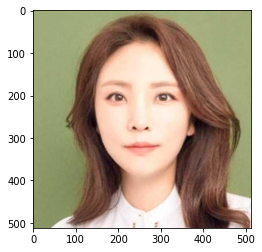

In [46]:
I2=cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I2)

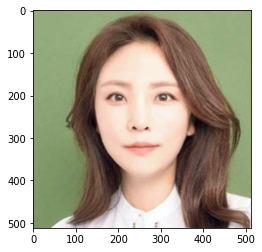

In [47]:
out2=cv2.cvtColor(outImg, cv2.COLOR_BGR2RGB)
plt.imshow(out2)